In [10]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
from pylab import mpl

# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]

In [11]:
# header = ['longitude', 'latitude', 'housingMedianAge',
#           'totalRooms', 'totalBedrooms', 'population',
#           'households', 'medianIncome', 'medianHouseValue']
header = ['经度', '纬度', '住房年龄中位数', '总房间数', '卧室总数', '人口', '家庭', '中位数收入', '中位数房屋价值']
df = pd.read_csv('cal_housing.data', names=header)
df.head()

,经度,纬度,住房年龄中位数,总房间数,卧室总数,人口,家庭,中位数收入,中位数房屋价值
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   经度       20640 non-null  float64
 1   纬度       20640 non-null  float64
 2   住房年龄中位数  20640 non-null  float64
 3   总房间数     20640 non-null  float64
 4   卧室总数     20640 non-null  float64
 5   人口       20640 non-null  float64
 6   家庭       20640 non-null  float64
 7   中位数收入    20640 non-null  float64
 8   中位数房屋价值  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
#查看重复值
df.duplicated().sum()

0

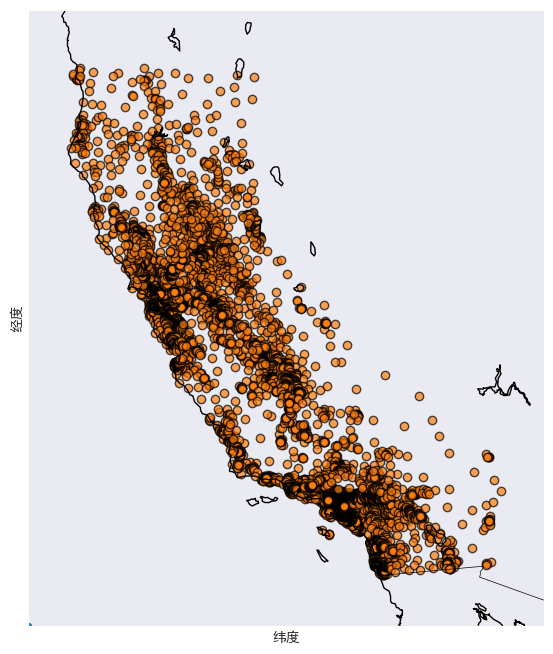

In [14]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='纬度', y='经度', data=df)
# 创建地图
m = Basemap(
    projection='merc',
    llcrnrlat=df['纬度'].min() - 1,
    urcrnrlat=df['纬度'].max() + 1,
    llcrnrlon=df['经度'].min() - 1,
    urcrnrlon=df['经度'].max() + 1,
    resolution='i'
)
# 画出海岸线和国家边界
m.drawcoastlines()
m.drawcountries()
# 将经纬度转换为地图坐标
x, y = m(df['经度'].values, df['纬度'].values)
# 在地图上添加散点
scatter = m.scatter(x, y, alpha=0.7, edgecolor='k', linewidth=1)
plt.show()

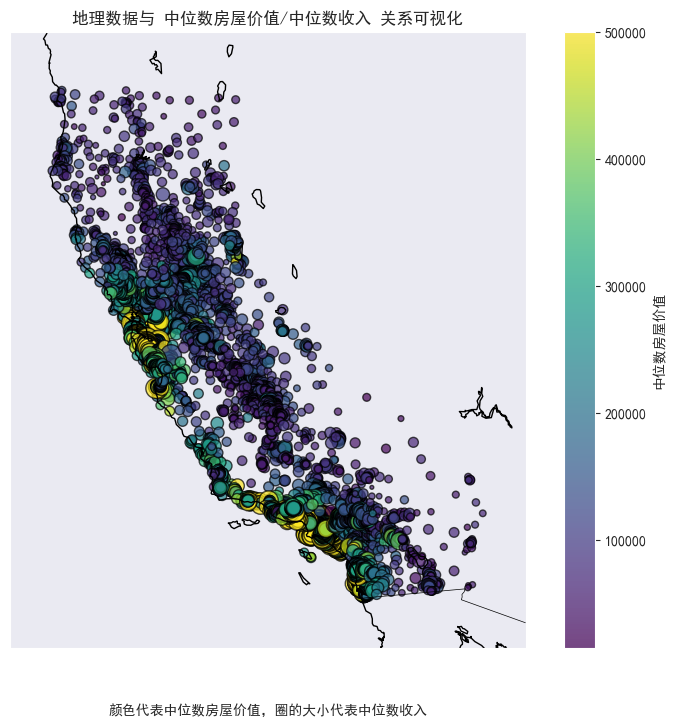

In [15]:
plt.figure(figsize=(10, 8))
m.drawcoastlines()
m.drawcountries()
scatter = m.scatter(x, y, c=df['中位数房屋价值'], cmap='viridis', s=df['中位数收入'] * 15,
                    alpha=0.7, edgecolor='k', linewidth=1)
# 添加颜色条
plt.colorbar(scatter, label='中位数房屋价值')
plt.title('地理数据与 中位数房屋价值/中位数收入 关系可视化')
plt.text(0.5, -0.1, '颜色代表中位数房屋价值，圈的大小代表中位数收入', ha='center', va='center',
         transform=plt.gca().transAxes)
plt.show()

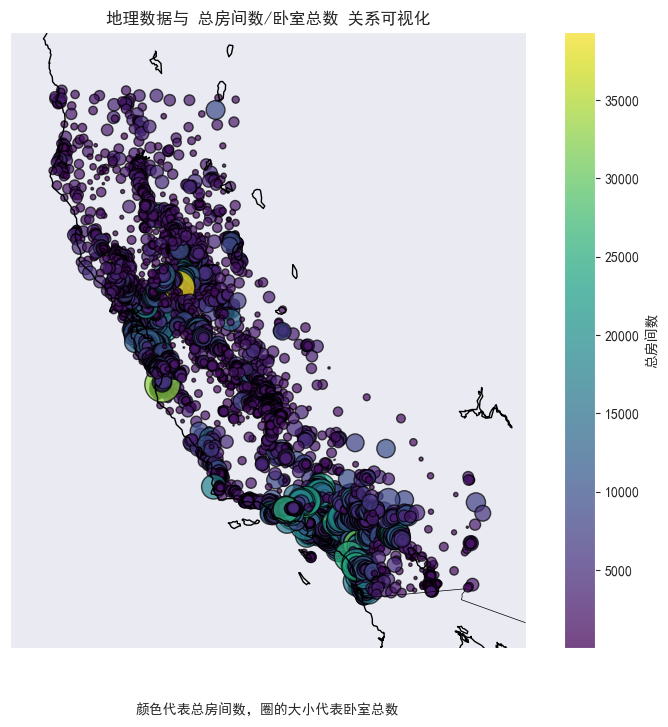

In [16]:
plt.figure(figsize=(10, 8))
m.drawcoastlines()
m.drawcountries()
scatter = m.scatter(x, y, c=df['总房间数'], cmap='viridis', s=df['卧室总数'] * 0.1,
                    alpha=0.7, edgecolor='k', linewidth=1)
# 添加颜色条
plt.colorbar(scatter, label='总房间数')
plt.title('地理数据与 总房间数/卧室总数 关系可视化')
plt.text(0.5, -0.1, '颜色代表总房间数，圈的大小代表卧室总数', ha='center', va='center',
         transform=plt.gca().transAxes)
plt.show()

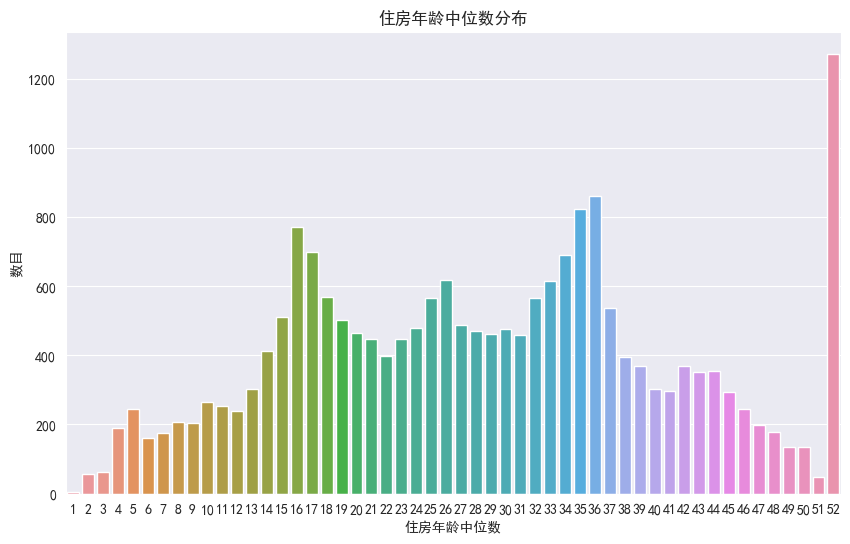

In [17]:
plt.figure(figsize=(10, 6))
# 使用 Seaborn 的 countplot 函数绘制 'housingMedianAge' 的柱状图
df['住房年龄中位数'] = df['住房年龄中位数'].astype(int)
sns.countplot(x='住房年龄中位数', data=df)
# 添加标题和轴标签
plt.title('住房年龄中位数分布')
plt.xlabel('住房年龄中位数')
plt.ylabel('数目')
# 显示图形
plt.show()

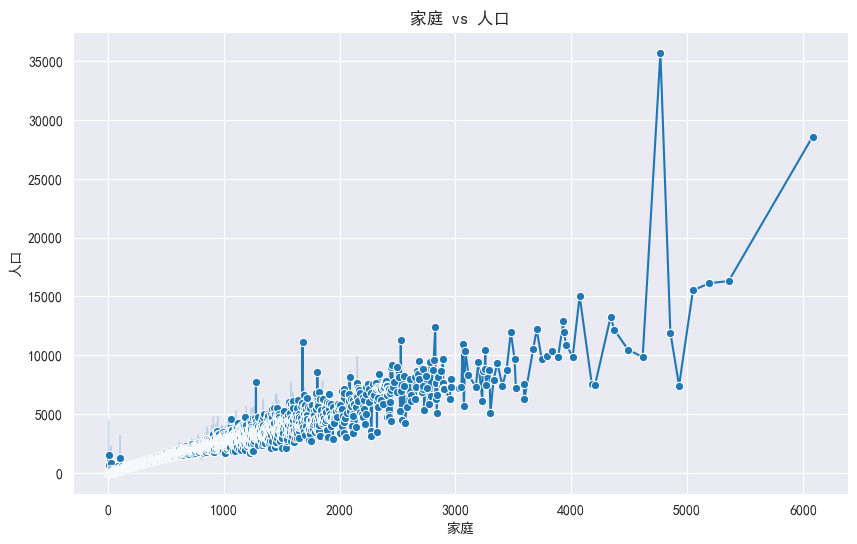

In [18]:
plt.figure(figsize=(10, 6))
# 使用Seaborn的lineplot函数绘制折线图
sns.lineplot(x='家庭', y='人口', data=df, marker='o')
# 添加标题和轴标签
plt.title('家庭 vs 人口')
plt.xlabel('家庭')
plt.ylabel('人口')
# 显示图形
plt.show()